In [75]:
%pylab inline
import numpy as np

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Data

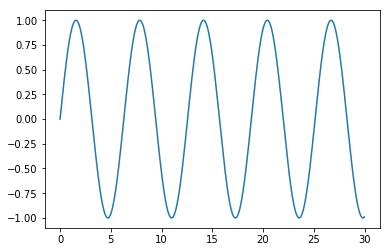

In [100]:
x = np.arange(0, 30, 0.01)  
y = np.sin(np.arange(0, 30, 0.01))

x = x.reshape((-1, 1))
y = y.reshape((-1, 1))

plot(x, y)

## Hyperparameter Optimization

In [90]:
model = Lasso()

params = dict(alpha=[1.0, 0.8, 0.5, 0.3, 0.1])
grid_search = GridSearchCV(model, param_grid=params)
grid_result = grid_search.fit(x, y)

In [92]:
_mean_scores = grid_result.cv_results_['mean_test_score']
_stds = grid_result.cv_results_['std_test_score']
_params = grid_result.cv_results_['params']

print('Best:', grid_result.best_params_)
for mean, std, param in zip(_mean_scores, _stds, _params):
    print(f'Mean Score:{mean:.7},\tSTD Score:{std:.5},\tParams: {param}')

Best: {'alpha': 0.1}
Mean Score:0.9718198,	STD Score:0.0048052,	Params: {'alpha': 1.0}
Mean Score:0.9718987,	STD Score:0.0048406,	Params: {'alpha': 0.8}
Mean Score:0.9719957,	STD Score:0.0048818,	Params: {'alpha': 0.5}
Mean Score:0.9720461,	STD Score:0.0049012,	Params: {'alpha': 0.3}
Mean Score:0.9720853,	STD Score:0.004914,	Params: {'alpha': 0.1}


## Training

In [77]:
model = Lasso(alpha=0.3)
model.fit(x, y)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### Predict

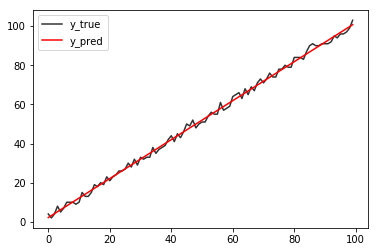

In [83]:
y_pred = model.predict(x)
plot(x, y, label='y_true', color='#333333')
plot(x, y_pred, label='y_pred', color='red')
legend()